## Download of stock prices and sell-side analyst ratings using LSEG API
---
### Stock prices

In [1]:
import lseg.data as ld
import pandas as pd

In [2]:
# Start a session with the LSEG Data Platform (needs Refinitiv Workspace to be running in the background)
ld.open_session()

<lseg.data.session.Definition object at 0x1f181cc7350 {name='workspace'}>

- S&P 500 companies

https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [4]:
sp500_companies = pd.read_csv("../data/sp500_companies.csv", dtype={"CIK": str})
sp500_ciks = sp500_companies["CIK"].tolist()

In [ ]:
# Get adjusted closing prices for AAPL.O with date range and interval
data = ld.get_history(
    #universe=tickers,
    universe = sp500_ciks,
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=["TR.CLOSEPRICE"],
  # Request adjusted close field
)

c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_access_layer\_containers.py:62:UserWarning: You have duplicated instruments in your input. Output will contain unique instruments only.
c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [ ]:
# Melt into long format for easier handling
df = data.reset_index().melt(id_vars='Date', var_name='CIK', value_name='Close_price')

# Merge with company names
df = df.merge(sp500_companies[['CIK', 'Security']], on='CIK', how='left')

# Convert Date to only contain month and year
df['Date'] = df['Date'].dt.to_period('M').astype(str)

In [11]:
# Save to CSV
df.to_csv("data/sp500_monthly_prices.csv", index=False)

- S&P MidCap 600 component stocks

https://en.wikipedia.org/wiki/List_of_S%26P_600_companies

In [39]:
sp600_companies = pd.read_csv("data/sp600_companies.csv", dtype={"CIK": str})
sp600_ciks = sp600_companies["CIK"].tolist()

In [16]:
# Get adjusted closing prices for AAPL.O with date range and interval
data = ld.get_history(
    #universe=tickers,
    universe = sp600_ciks,
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=["TR.CLOSEPRICE"],
  # Request adjusted close field
)

c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_access_layer\_containers.py:62:UserWarning: You have duplicated instruments in your input. Output will contain unique instruments only.
c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [18]:
# Melt into long format for easier handling
df = data.reset_index().melt(id_vars='Date', var_name='CIK', value_name='Close_price')

# Merge with company names
df = df.merge(sp600_companies[['CIK', 'Security']], on='CIK', how='left')

# Convert Date to only contain month and year
df['Date'] = df['Date'].dt.to_period('M').astype(str)

In [20]:
df

,Date,CIK,Close_price,Security
0,2000-01,0001158449,<NA>,"Advance Auto Parts, Inc."
1,2000-01,0001158449,<NA>,"Advance Auto Parts, Inc."
2,2000-01,0001158449,<NA>,"Advance Auto Parts, Inc."
3,2000-02,0001158449,<NA>,"Advance Auto Parts, Inc."
4,2000-02,0001158449,<NA>,"Advance Auto Parts, Inc."
...,...,...,...,...
350961,2024-08,0001439288,32.43,Zurn Elkay Water Solutions Corp.
350962,2024-09,0001439288,35.94,Zurn Elkay Water Solutions Corp.
350963,2024-10,0001439288,36.1,Zurn Elkay Water Solutions Corp.
350964,2024-11,0001439288,39.82,Zurn Elkay Water Solutions Corp.


In [21]:
# Save to CSV
df.to_csv("data/sp600_monthly_prices.csv", index=False)

- S&P 400 companies


In [31]:
sp400_companies = pd.read_csv("data/sp400_companies.csv", dtype={"CIK": str})
sp400_ciks = sp400_companies["CIK"].tolist()

In [32]:
# Get adjusted closing prices for AAPL.O with date range and interval
data = ld.get_history(
    #universe=tickers,
    universe = sp400_ciks,
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=["TR.CLOSEPRICE"],
  # Request adjusted close field
)

c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_access_layer\_containers.py:62:UserWarning: You have duplicated instruments in your input. Output will contain unique instruments only.
c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [33]:
# Melt into long format for easier handling
df = data.reset_index().melt(id_vars='Date', var_name='CIK', value_name='Close_price')

# Merge with company names
df = df.merge(sp400_companies[['CIK', 'Security']], on='CIK', how='left')

# Convert Date to only contain month and year
df['Date'] = df['Date'].dt.to_period('M').astype(str)

In [34]:
# Save to CSV
df.to_csv("data/sp400_monthly_prices.csv", index=False)

---

### Sell-side analyst ratings

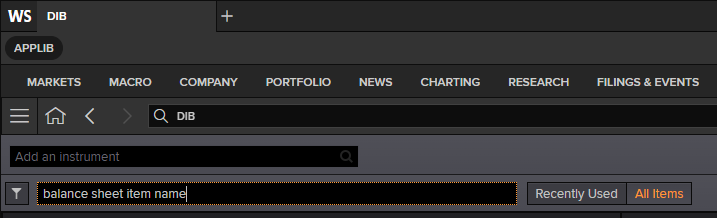


enter "DIB" in workspace

In [1]:
import lseg.data as ld
import pandas as pd

In [2]:
# Start a session with the LSEG Data Platform (needs Refinitiv Workspace to be running in the background)
ld.open_session()

<lseg.data.session.Definition object at 0x1d8c84e6950 {name='workspace'}>

In [6]:
# Read in company names to look up buy/sell recommendations for
sp400_companies = pd.read_csv("data/sp400_companies.csv", dtype={"CIK": str})
sp500_companies = pd.read_csv("data/sp500_companies.csv", dtype={"CIK": str})
sp600_companies = pd.read_csv("data/sp600_companies.csv", dtype={"CIK": str})

In [ ]:
# Combine all CIKs into a single list
sp400_ciks = sp400_companies["CIK"].tolist()
sp500_ciks = sp500_companies["CIK"].tolist()
sp600_ciks = sp600_companies["CIK"].tolist()
ciks = sp400_ciks + sp500_ciks + sp600_ciks

['0001675149',
 '0000006201',
 '0000824142',
 '0001520697',
 '0001646972',
 '0000868857',
 '0000917251',
 '0001042046',
 '0000880266',
 '0000109563',
 '0000066756',
 '0000866291',
 '0000766421',
 '0000040729',
 '0001034670',
 '0001623925',
 '0000896262',
 '0001004434',
 '0001562401',
 '0001047127',
 '0000350698',
 '0001018840',
 '0001796209',
 '0001433195',
 '0001433270',
 '0001584509',
 '0000007536',
 '0000007789',
 '0000890564',
 '0001674862',
 '0001018963',
 '0000896622',
 '0001122976',
 '0000008858',
 '0001722482',
 '0001616862',
 '0001144215',
 '0000701985',
 '0000014930',
 '0000078890',
 '0000913142',
 '0001685040',
 '0001786352',
 '0000012208',
 '0001531152',
 '0001130464',
 '0001633931',
 '0001280058',
 '0001048477',
 '0001772016',
 '0001109354',
 '0001581068',
 '0001579298',
 '0001486957',
 '0000906553',
 '0000016058',
 '0001299939',
 '0000723612',
 '0001579091',
 '0000726958',
 '0001639438',
 '0000022356',
 '0000016040',
 '0001219601',
 '0000860546',
 '0001341766',
 '00000392

In [17]:
# Get adjusted closing prices for AAPL.O with date range and interval
data = ld.get_history(
    #universe=tickers,
    universe = ciks,
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=[
        "TR.RecLabel",
        "TR.RecMean"
    ],
)

c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_access_layer\_containers.py:62:UserWarning: You have duplicated instruments in your input. Output will contain unique instruments only.
c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [139]:
df = data.copy()

In [ ]:
# Assume df is your original DataFrame with datetime index and multi-level columns
df = df.reset_index().rename(columns={'index': 'Date'})

# Flatten the MultiIndex columns (?)
df.columns = ['Date'] + [f'{c[0]}|{c[1]}' for c in df.columns[1:]]
df.head()


,Date,0001675149|Recommendation - Mean Label,0001675149|Recommendation - Mean (1-5),0000006201|Recommendation - Mean Label,0000006201|Recommendation - Mean (1-5),0000824142|Recommendation - Mean Label,0000824142|Recommendation - Mean (1-5),0001520697|Recommendation - Mean Label,0001520697|Recommendation - Mean (1-5),0001646972|Recommendation - Mean Label,...,0001770450|Recommendation - Mean Label,0001770450|Recommendation - Mean (1-5),0001345016|Recommendation - Mean Label,0001345016|Recommendation - Mean (1-5),0001856314|Recommendation - Mean Label,0001856314|Recommendation - Mean (1-5),0001084048|Recommendation - Mean Label,0001084048|Recommendation - Mean (1-5),0001439288|Recommendation - Mean Label,0001439288|Recommendation - Mean (1-5)
0,1996-06-27,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1997-08-14,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1997-10-16,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1997-11-17,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1998-01-15,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [143]:
# Melt the wide DataFrame to long format
df_long = df.melt(id_vars='Date', var_name='Company_Info', value_name='Value')

# Split the 'Company_Info' column into Company and Type
df_long[['Company', 'Type']] = df_long['Company_Info'].str.split('|', expand=True)

# Pivot so each row has verbal and numeric recommendations
df_tidy = df_long.pivot(index=['Date', 'Company'], columns='Type', values='Value').reset_index()
df_tidy.head()

# Rename columns for clarity
df_tidy.columns = ['Date', 'Company', 'Mean_rating', 'Rating']

# Strip timestamp in date column
df_tidy['Date'] = df_tidy['Date'].dt.to_period('D').astype(str)

# Display
df_tidy.head()

In [145]:
# Merge with company names
# First combine all company names into a single DataFrame
company_names = pd.concat([
    sp400_companies[['CIK', 'Security']],
    sp500_companies[['CIK', 'Security']],
    sp600_companies[['CIK', 'Security']]
]).drop_duplicates()

# Actual merge
final_df = df_tidy.merge(
    company_names,
    left_on='Company',
    right_on='CIK', 
    how='left'
).drop(columns=['CIK'])

# Strip timestamp in date column
final_df['Date'] = final_df['Date'].dt.to_period('D').astype(str)

# Display
final_df.head()

,Date,Company,Mean_rating,Rating,Security
0,1996-06-27,0000001750,<NA>,<NA>,AAR CORP.
1,1996-06-27,0000001800,<NA>,<NA>,Abbott Laboratories
2,1996-06-27,0000002488,<NA>,<NA>,Advanced Micro Devices
3,1996-06-27,0000002969,<NA>,<NA>,Air Products
4,1996-06-27,0000003453,<NA>,<NA>,"Matson, Inc."


In [146]:
# Rename Company to CIK
final_df.rename(columns={'Company': 'CIK'}, inplace=True)

# Save to CSV
final_df.to_csv("data/sp1500_sell_side_recommendations.csv", index=False)

---

#### Function to extract most recent rating for a given date and security

In [147]:
df = pd.read_csv("data/sp1500_sell_side_recommendations.csv", dtype={"Date": str, "CIK": str})

In [149]:
df.head()

,Date,CIK,Mean_rating,Rating,Security
0,1996-06-27,0000001750,NaN,NaN,AAR CORP.
1,1996-06-27,0000001800,NaN,NaN,Abbott Laboratories
2,1996-06-27,0000002488,NaN,NaN,Advanced Micro Devices
3,1996-06-27,0000002969,NaN,NaN,Air Products
4,1996-06-27,0000003453,NaN,NaN,"Matson, Inc."


In [175]:
def most_recent_rating(df, company_cik, date):
  
    # Filter DataFrame for the given company and date
    filtered_df = df[(df['CIK'] == company_cik) & (df['Date'] <= date)]
    
    # Filter out rows where 'Rating' is NaN
    non_nas = filtered_df[filtered_df['Rating'].notna()]

    # Grab most recent rating
    if not non_nas.empty:
        #return non_nas.iloc[-1]['Rating']
        return f"The most recent rating for CIK {company_cik} is {non_nas.iloc[-1]['Rating']}, which was issued on {non_nas.iloc[-1]['Date']}."
    else:
        return None

In [ ]:
date = "2015-10-01"
company_cik = "0001395942"
most_recent_rating(df, company_cik, date)

In [161]:
ld.close_session()